# EEG Sinal processing

In [5]:
# we will use the scikit-learn package, see https://scikit-learn.org/stable/

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans

# IN THE PROJECT WE WANT TO HAVE A TABLE OF THIS TYPE
#First, we will load the table of features that contains a total of 25 signals (rows), 
# where each signal was processed to obtain 5 features (columns)

data = np.loadtxt('1638C_Control.txt')
print(data)

# each column is a feature!!
# each row is a sample : first 5 FFTs (?)


[[ 37.952896  31.85243   29.252232 ...  19.051453   5.250401 -16.451256]
 [ 37.452858  30.752346  24.051834 ...  21.351629   6.750515 -16.751278]
 [ 37.052826  30.752346  20.751583 ...  22.15169    7.850599 -17.151308]
 ...
 [  0.050004   0.050004   0.050004 ...   0.050004   0.050004   0.050004]
 [  0.050004   0.050004   0.050004 ...   0.050004   0.050004   0.050004]
 [  0.050004   0.050004   0.050004 ...   0.050004   0.050004   0.050004]]


In [6]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,37.952896,31.852430,29.252232,41.353153,-25.951981,-21.251621,12.450950,22.151690,23.951828,19.051453,35.552711,2.550195,13.851057,39.653027,19.751507,-11.350866,19.051453,5.250401,-16.451256
1,37.452858,30.752346,24.051834,42.653255,-24.951904,-23.051758,12.250935,20.951599,24.251850,18.151384,37.152836,3.150240,13.050996,38.252918,15.351171,-10.950835,21.351629,6.750515,-16.751278
2,37.052826,30.752346,20.751583,43.853344,-25.751965,-24.551872,13.151003,20.251545,24.351858,17.051300,38.252918,4.250324,14.451102,38.452934,11.850904,-8.850676,22.151690,7.850599,-17.151308
3,36.452782,31.752422,20.751583,44.053360,-28.052139,-25.251926,14.551110,19.851515,24.051834,15.651194,38.852962,5.450416,17.151308,40.553093,10.350790,-5.450416,20.951599,8.750668,-17.051300
4,35.652721,33.252537,25.351934,43.353306,-31.152376,-24.951904,15.551187,19.751507,23.251774,14.651117,39.953049,6.450492,20.151537,43.753338,10.850828,-1.850141,17.751354,9.850752,-15.451179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78843,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004
78844,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004
78845,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004
78846,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004,0.050004


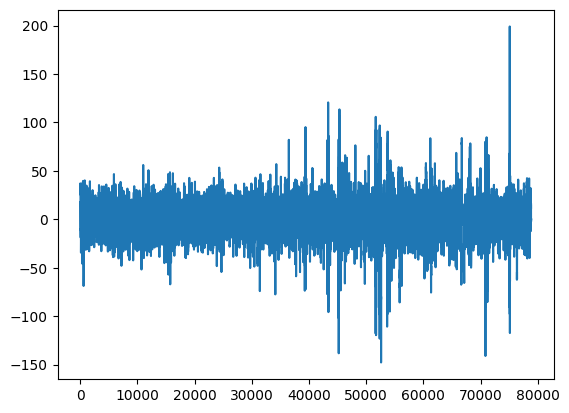

In [31]:
plt.plot(data[0:5000,1])

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fftpack import fft
from scipy.signal import welch


def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

In [20]:
N = 1000
T = 1/256
f_s = 256

In [23]:
f_values, fft_values = get_fft_values(data[0:1000,1], T, N, f_s)

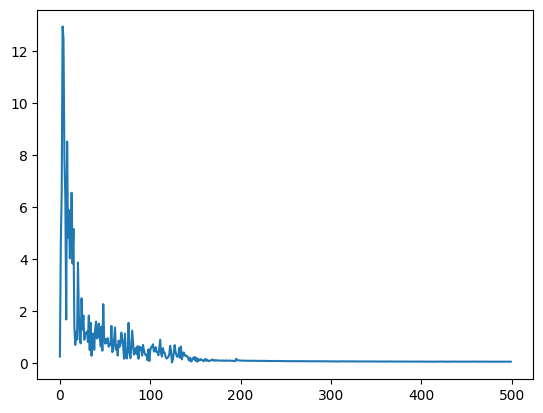

In [26]:
plt.plot(fft_values)

This is bad, we need to correct the FFT function. Probably N is not defined correctly. 